In [43]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

**Mediapipe setup**

In [75]:
# Initialize Mediapipe Hands model
mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils

# Mediapipe detection function
def mediapipe_detection(image, model):
    image = cv2.flip(image, 1)
    # Apply Gaussian Blur to reduce noise
    blurred_image = cv2.GaussianBlur(image, (5, 5), 0)
    image = blurred_image
    # Convert the BGR image to RGB for Mediapipe processing
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    # Process the RGB image and get results
    results = model.process(image_rgb)
    # Convert the image back to BGR for OpenCV visualization
    image_bgr = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2BGR)

    return image_bgr, results

# Draw the hand landmarks on the image
def draw_landmarks(image, results):
    if results.multi_hand_landmarks:
        for hand_landmarks in results.multi_hand_landmarks:
            # Draw the landmarks and the connections between them
            mp_drawing.draw_landmarks(image, hand_landmarks, mp_hands.HAND_CONNECTIONS)


# Extract keypoints for each hand
def extract_keypoints_with_handedness(results):
    hand_keypoints = []
    
    if results.multi_hand_landmarks and results.multi_handedness:
        for idx, hand_landmarks in enumerate(results.multi_hand_landmarks):
            # Get left or right hand classification
            hand_type = results.multi_handedness[idx].classification[0].label  # Left or Right hand
            hand_points = []
            for landmark in hand_landmarks.landmark:
                hand_points.append([landmark.x, landmark.y, landmark.z])  # Normalized x, y, z coordinates
            hand_keypoints.append({
                'hand': hand_type,
                'keypoints': np.array(hand_points)  # Convert to a NumPy array for further processing
            })
    return hand_keypoints

# #Handedness as a feature
# def prepare_input_data_for_lstm(hand_keypoints):
#     input_data = []
#     for hand in hand_keypoints:
#         hand_type = 1 if hand['hand'] == 'Right' else 0  # 1 for right, 0 for left
#         keypoints = hand['keypoints'].flatten()  # Flatten the keypoints array
#         input_data.append(np.append(keypoints, hand_type))  # Append handedness as a feature
#     return np.array(input_data)

def prepare_input_data_for_lstm(hand_keypoints):
    # Define zero matrices for padding (21 landmarks per hand with x, y, z coordinates)
    zero_hand = np.zeros((21, 3))  # Shape (21, 3) for each hand's keypoints
    
    # Initialize variables for right and left hand data
    right_hand_data = zero_hand.flatten()  # Default to zero matrix
    left_hand_data = zero_hand.flatten()   # Default to zero matrix
    right_hand_type = 0  # Default to 0 (no right hand detected)
    left_hand_type = 0   # Default to 0 (no left hand detected)

    # Process each hand in the detected keypoints
    for hand_data in hand_keypoints:
        if hand_data['hand'] == 'Right':
            right_hand_data = hand_data['keypoints'].flatten()
            right_hand_type = 1  # Right hand detected, 1 for right hand
        elif hand_data['hand'] == 'Left':
            left_hand_data = hand_data['keypoints'].flatten()
            left_hand_type = 0   # Left hand detected, 1 for left hand

    # Combine right hand, left hand, and their respective handedness
    combined_data = np.hstack([right_hand_data, right_hand_type, left_hand_data, left_hand_type])

    return combined_data


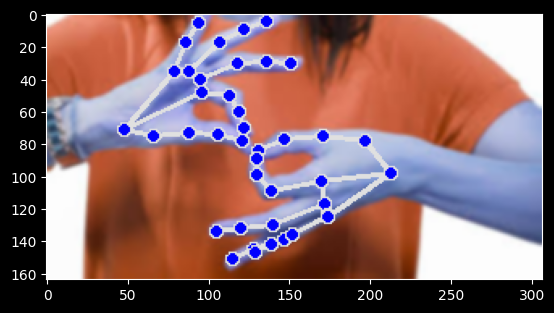

In [76]:
testImg = cv2.imread("C:/Users/StrawHat/MasterRepo/Projects/samvaad.ai/images.jpeg")
test = testImg

image, results = mediapipe_detection(test, mp_hands.Hands(min_detection_confidence=0.7, min_tracking_confidence=0.7))

draw_landmarks(image, results)

keypoints = extract_keypoints_with_handedness(results)

DataFeed = prepare_input_data_for_lstm(keypoints)

plt.imshow(image)

In [77]:
print(DataFeed)


[ 6.96276963e-01  6.02122307e-01  7.32018009e-07  6.42680228e-01
  4.79025960e-01 -4.10057791e-02  5.58050334e-01  4.61601585e-01
 -6.00756891e-02  4.80605632e-01  4.69617486e-01 -6.75695539e-02
  4.27761376e-01  5.13402700e-01 -7.05372989e-02  5.55711269e-01
  6.29654765e-01 -8.93127173e-02  4.53954965e-01  6.66993558e-01
 -1.14220344e-01  4.24990088e-01  6.09418690e-01 -1.14525452e-01
  4.25016761e-01  5.48380852e-01 -1.07032530e-01  5.62280774e-01
  7.13489115e-01 -6.97526559e-02  4.57803011e-01  7.96210825e-01
 -1.00413598e-01  3.91068637e-01  8.07818294e-01 -1.07731991e-01
  3.45132262e-01  8.20183575e-01 -1.07333384e-01  5.66848159e-01
  7.57879496e-01 -4.87561561e-02  4.80386853e-01  8.50612402e-01
 -7.15435296e-02  4.20125842e-01  8.88142169e-01 -8.09093565e-02
  3.75390291e-01  9.20914650e-01 -8.28299150e-02  5.68479121e-01
  7.66803741e-01 -2.86935829e-02  4.98030573e-01  8.32776845e-01
 -4.02931497e-02  4.53294396e-01  8.70775938e-01 -4.41342145e-02
  4.21464682e-01  8.97293

**Mediapipe Testing**

In [80]:
cap = cv2.VideoCapture(1)  # Capture from webcam
with mp_hands.Hands(min_detection_confidence=0.7, min_tracking_confidence=0.7) as hands:
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        # Use the mediapipe_detection function
        image, results = mediapipe_detection(frame, hands)

        # Draw the landmarks on the image
        draw_landmarks(image, results)

        keypoints = extract_keypoints_with_handedness(results)
        print(keypoints)

        # Show the output
        cv2.imshow('Hand Tracking', image)

        # Break the loop if 'q' is pressed
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()

[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[{'hand': 'Right', 'keypoints': array([[ 8.15861642e-01,  9.68835473e-01,  4.38308518e-07],
       [ 7.46327996e-01,  9.58617687e-01, -5.61395362e-02],
       [ 6.83879793e-01,  9.01193678e-01, -9.21535492e-02],
       [ 6.39751196e-01,  8.48309696e-01, -1.22538857e-01],
       [ 6.28771424e-01,  8.04246485e-01, -1.50359198e-01],
       [ 7.38926828e-01,  7.31264114e-01, -4.90500815e-02],
       [ 7.20926702e-01,  6.46166325e-01, -9.36423317e-02],
       [ 6.99705958e-01,  6.43699646e-01, -1.30692780e-01],
       [ 6.80721879e-01,  6.66090250e-01, -1.52012736e-01],
       [ 7.91226208e-01,  7.12792337e-01, -4.39656004e-02],
       [ 7.96189606e-01,  6.05321169e-01, -7.34656379e-02],
       [ 7.87953556e-01,  5.45237541e-01, -9.93865728e-02],
       [ 7.77825475e-01,  4.95176315e-01, -1.17704980e-01],
       [ 8.38236809e-01,  7.26638496e-01, -4.70188409e-02],
       [ 8.53002191e-01,  6.32090986e-01, -7

In [81]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('ISL_Data') 

# Actions that we try to detect
actions = np.array(['A', 'B', 'C', 'D', 'E', 'F', 'G'])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30


In [82]:
for action in actions:
    for sequence in range(no_sequences):
        try:
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass


In [83]:
cap = cv2.VideoCapture(1)
# Set mediapipe model
with mp_hands.Hands(min_detection_confidence=0.7, min_tracking_confidence=0.7) as hands:

    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, hands)

                # Draw landmarks
                draw_landmarks(image, results)

                # NEW Apply wait logic
                if frame_num == 0:
                    cv2.putText(image, 'STARTING COLLECTION', (120, 200),
                                cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15, 12),
                                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(500)
                else:
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15, 12),
                                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)

                # NEW Export keypoints
                keypoints = extract_keypoints_with_handedness(results)
                encoded_keypoints = prepare_input_data_for_lstm(keypoints)
                
                npy_path = os.path.join(
                    DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, encoded_keypoints)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()

Model Building

In [84]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [85]:
label_map = {label:num for num, label in enumerate(actions)}
label_map

{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6}

In [86]:
sequences, labels = [], []
for action in actions:
    for sequence in np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [87]:
print(np.array(sequences).shape)
print(np.array(labels).shape)

(210, 30, 128)
(210,)


In [88]:
X = np.array(sequences)
X.shape

(210, 30, 128)

In [89]:
y = to_categorical(labels).astype(int)
y.shape

(210, 7)

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [91]:
print(X_train.shape)
print(X_test.shape) 
print(y_train.shape)
print(y_test.shape)

(199, 30, 128)
(11, 30, 128)
(199, 7)
(11, 7)


In [92]:
from tensorflow.keras.callbacks import TensorBoard

# Define TensorBoard callback
log_dir = os.path.join('Samvaad_Logs')
tb_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)


In [93]:
from tensorflow.keras.callbacks import EarlyStopping

# Define EarlyStopping callback
early_stopping_callback = EarlyStopping(
    monitor='val_accuracy',        # Can be 'val_accuracy', 'accuracy', etc.
    patience=10,               # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True  # Whether to restore model weights from the epoch with the best value of the monitored quantity
)


LSTM and Dropout

In [96]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization

# Define the model
model = Sequential()

# First LSTM layer with dropout and batch normalization
model.add(LSTM(256, return_sequences=True, input_shape=(30, 128)))
model.add(Dropout(0.4))  # Dropout for regularization
model.add(BatchNormalization())  # Batch normalization for stable learning

# Second LSTM layer with dropout and batch normalization
model.add(LSTM(128, return_sequences=True))
model.add(Dropout(0.4))
model.add(BatchNormalization())

# Third LSTM layer with dropout and batch normalization
model.add(LSTM(64, return_sequences=True))
model.add(Dropout(0.4))
model.add(BatchNormalization())

# Fourth LSTM layer with dropout and batch normalization
model.add(LSTM(32))
model.add(Dropout(0.4))
model.add(BatchNormalization())

# Fully connected dense layers
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.4))  # Dropout for regularization

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))  # Dropout for regularization

# Output layer for multi-class classification (7 classes)
model.add(Dense(7, activation='softmax'))

# Compile the model with sparse_categorical_crossentropy
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Print model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 30, 256)           394240    
                                                                 
 dropout_6 (Dropout)         (None, 30, 256)           0         
                                                                 
 batch_normalization_4 (Batc  (None, 30, 256)          1024      
 hNormalization)                                                 
                                                                 
 lstm_5 (LSTM)               (None, 30, 128)           197120    
                                                                 
 dropout_7 (Dropout)         (None, 30, 128)           0         
                                                                 
 batch_normalization_5 (Batc  (None, 30, 128)          512       
 hNormalization)                                      

Model Training

In [98]:
# Fit the model with both TensorBoard and EarlyStopping callbacks
history = model.fit(
    X_train, y_train,
    epochs=2000,
    validation_data=(X_test, y_test),
    callbacks=[tb_callback]
)


Epoch 1/2000
7/7 [==============================] - 1s 103ms/step - loss: 0.8996 - accuracy: 0.7035 - val_loss: 1.0610 - val_accuracy: 0.6364
Epoch 2/2000
7/7 [==============================] - 1s 98ms/step - loss: 0.8347 - accuracy: 0.7186 - val_loss: 0.8038 - val_accuracy: 0.7273
Epoch 3/2000
7/7 [==============================] - 1s 94ms/step - loss: 0.7716 - accuracy: 0.7387 - val_loss: 0.8861 - val_accuracy: 0.6364
Epoch 4/2000
7/7 [==============================] - 1s 90ms/step - loss: 0.6900 - accuracy: 0.7437 - val_loss: 0.9197 - val_accuracy: 0.8182
Epoch 5/2000
7/7 [==============================] - 1s 93ms/step - loss: 0.6483 - accuracy: 0.7638 - val_loss: 0.9221 - val_accuracy: 0.6364
Epoch 6/2000
7/7 [==============================] - 1s 97ms/step - loss: 0.6421 - accuracy: 0.7638 - val_loss: 1.0831 - val_accuracy: 0.6364
Epoch 7/2000
7/7 [==============================] - 1s 87ms/step - loss: 0.6745 - accuracy: 0.7638 - val_loss: 1.0873 - val_accuracy: 0.5455
Epoch 8/2000

KeyboardInterrupt: 

Mdoel Save and Reload

In [99]:
model.save('samvaad1O.h5')

In [100]:
model.load_weights('samvaad1O.h5')

Evaluation

In [101]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [102]:
yhat = model.predict(X_test)
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()
multilabel_confusion_matrix(ytrue, yhat)

1/1 [==============================] - 2s 2s/step


array([[[10,  0],
        [ 1,  0]],

       [[ 8,  1],
        [ 0,  2]],

       [[ 8,  0],
        [ 0,  3]],

       [[ 9,  0],
        [ 1,  1]],

       [[ 9,  0],
        [ 2,  0]],

       [[ 8,  3],
        [ 0,  0]],

       [[10,  0],
        [ 0,  1]]], dtype=int64)

In [104]:
accuracy_score(ytrue, yhat)

0.6363636363636364

In [105]:
from scipy import stats

In [106]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        if num < len(colors):  # Check if index is within bounds
            cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
            cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

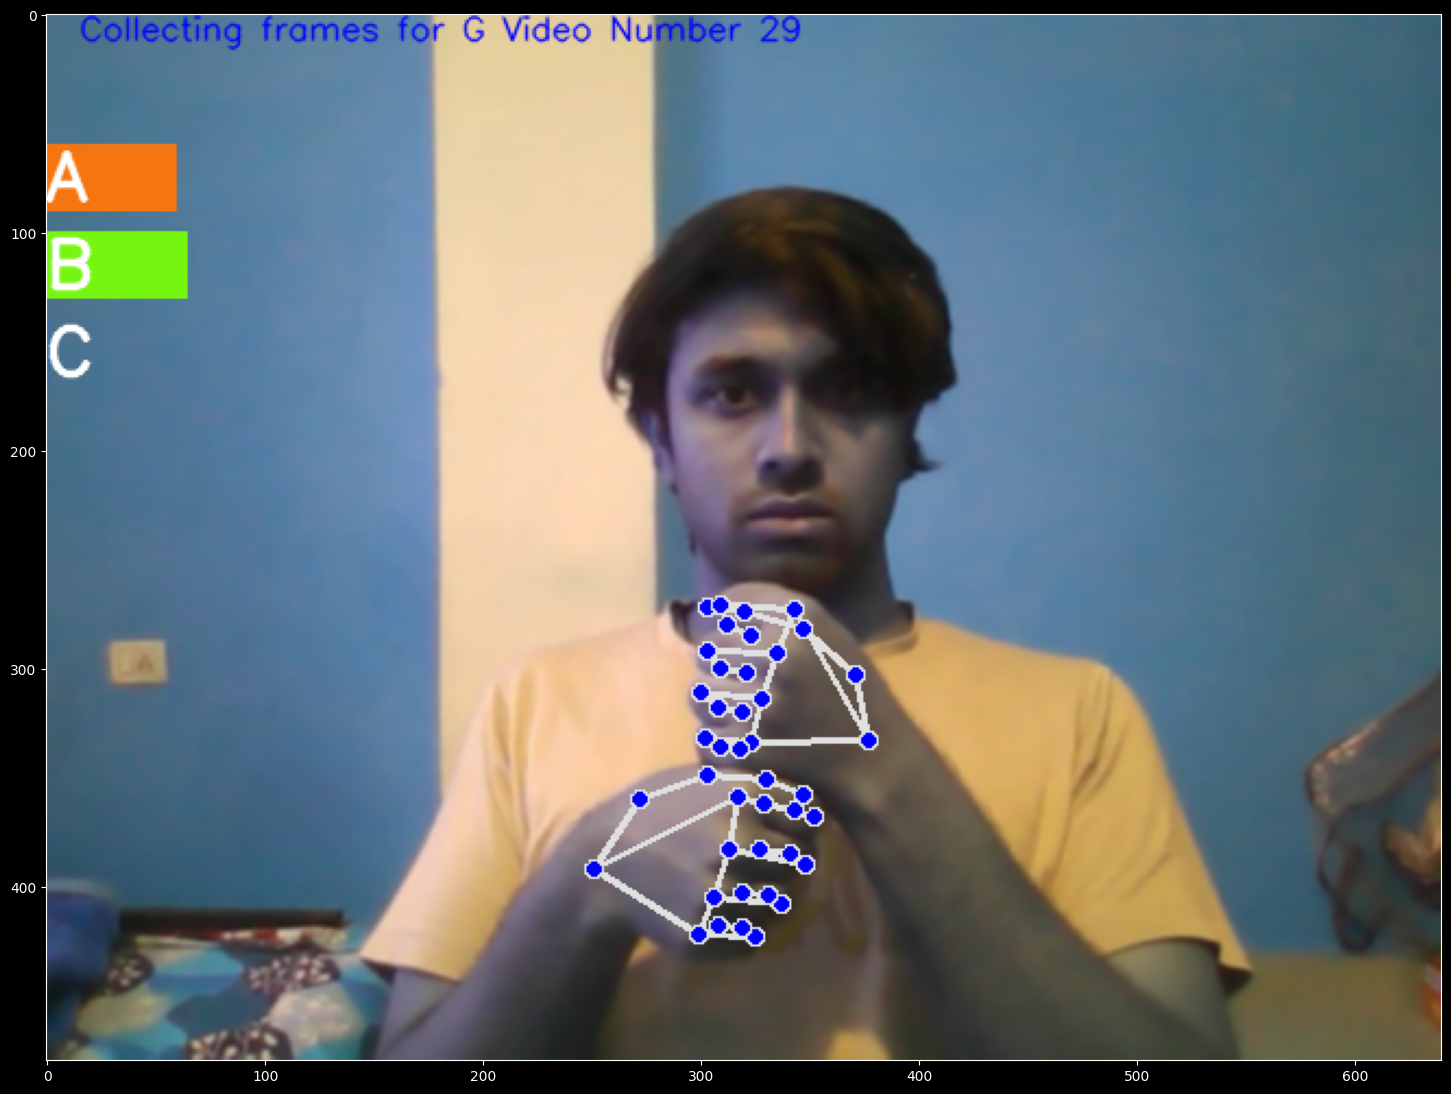

In [107]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

Live Testing

In [111]:
# 1. New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.7

cap = cv2.VideoCapture(1)
# Set mediapipe model 
with mp_hands.Hands(min_detection_confidence=0.7, min_tracking_confidence=0.7) as hands:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, hands)
        print(results)
        
        # Draw landmarks
        draw_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints_with_handedness(results)
        DataFeed = prepare_input_data_for_lstm(keypoints)
        sequence.append(DataFeed)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            
        #3. Viz logic
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

KeyboardInterrupt: 

In [114]:
sequence = []
sentence = []

cap = cv2.VideoCapture(1)
# Set mediapipe model 
with mp_hands.Hands(min_detection_confidence=0.7, min_tracking_confidence=0.7) as hands:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, hands)
        print(results)
        
        # Draw landmarks
        # Draw landmarks
        draw_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints_with_handedness(results)
        DataFeed = prepare_input_data_for_lstm(keypoints)
        sequence.append(DataFeed)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            predicted_action = actions[np.argmax(res)]
            print(predicted_action)
            
            # Update sentence
            if len(sentence) > 0: 
                if predicted_action != sentence[-1]:
                    sentence.append(predicted_action)
            else:
                sentence.append(predicted_action)

            # Keep only the last 5 actions in the sentence
            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Display predicted action on the top
            cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
            cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
            
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()


<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti